# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Exogenous variables](#7)
8. [Splitting training and test data with exogenous variables](#8)
9. [Implementation of StatsForecast with exogenous variables](#9)
10. [Evaluate the model for exogenous variables](#10)
11. [Conclusion](#11)
12. [References](12)

<a id="1"></a> 
# **Introduction**

Time series modeling is an essential tool in sales analysis and forecasting, and its application to the context of sales forecasting for the ADIDAS brand is of great relevance. ADIDAS is a renowned global sporting goods brand, known for its wide range of products and its presence in multiple markets.

Accurate ADIDAS sales forecasting is critical for strategic planning, inventory management, decision making, and achieving business goals. Time series modeling allows you to analyze and predict the patterns and trends inherent in historical sales data, helping you identify key factors that influence brand performance and make informed decisions about production, distribution and marketing strategies. marketing.

When modeling the time series of ADIDAS sales, various factors and variables are considered, such as seasonality in demand for sports products, long-term trends, promotional effects, major sporting events and other economic or social factors that may affect brand sales. These factors are captured by applying time series models, such as ARIMA, SARIMA models, exponential smoothing models or neural network models, among others.

Time series modeling provides deep insight into ADIDAS's past sales behavior and helps predict future sales more accurately. This allows the ADIDAS brand to make strategic decisions, optimize production, plan marketing campaigns and efficiently manage inventory based on identified demands and patterns.

In summary, time series modeling applied to ADIDAS brand sales forecasting is a valuable tool for understanding and predicting brand performance based on historical data. This helps ADIDAS make informed and strategic decisions, improving its ability to anticipate market demand and maintain a competitive advantage in the sporting goods industry.

<a id="2"></a>
# **Case study**

In this case study, we will explore how time series modeling can be applied to ADIDAS sales forecasting. ADIDAS is a renowned global sporting goods brand that operates in multiple markets and offers a wide range of products. Accurate sales forecasting is essential for ADIDAS as it allows them to effectively plan production, manage inventory and make strategic decisions to maximize revenue.

To carry out this case study, we will use a historical data set from ADIDAS. The data will include information on total sales, region, unit sales price, along with other relevant variables that may influence sales, such as promotions, sporting events, seasonal changes and economic factors. The goal is to use this data to build a time series model that can predict future sales of ADIDAS.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Sales Forecast.

Based on the time series analysis of ADIDAS sales and the construction of appropriate models, we can obtain accurate forecasts that help ADIDAS in making strategic decisions. Time series modeling provides a powerful tool to understand and predict fluctuations in brand sales, as well as to identify seasonal patterns, long-term trends and other factors that influence ADIDAS performance. This allows the brand to anticipate demand, adjust production and inventory, and design effective marketing strategies to maximize business performance.

## **Load Library**

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1.5


# Define the plot size
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

## **About Dataset**

The following data set has the following attributes:

- Retailer: The entity or organization selling Adidas products.
- Retailer ID: A unique identifier for each retailer.
- Invoice Date: The date when the sales transaction occurred.
- Region: The geographical region where the retailer operates.
- State: The state within the region where the retailer is located.
- City: The city where the retailer is situated.
- Product: The Adidas product being sold.
- Price per Unit: The cost of one unit of the Adidas product.
- Units Sold: The number of units of the Adidas product sold in a particular transaction.
- Total Sales: The total revenue generated from the sale of Adidas products in a transaction.
- Operating Profit: The profit earned by the retailer from the sale after deducting operating costs.
- Operating Margin: The percentage of operating profit in relation to total sales.
- Sales Method: The method or channel through which the sales transaction occurred.

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Adidas%20US%20Sales%20Data.csv",sep=";")
#df.columns = df.iloc[3]
#df = df.iloc[4:,1:].reset_index(drop=True)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/20,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,01/02/20,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,01/03/20,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,01/04/20,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,01/05/20,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [4]:
# We eliminate the dollar sign and the space from the comma
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.replace(',', '')
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '').str.replace(',', '')
df["Units Sold"]=df["Units Sold"].str.replace(',', '')

# Remove the % sign and divide by 100
df['Operating Margin']=df['Operating Margin'].str[:-1].astype(float)
df['Operating Margin'] = df['Operating Margin'] / 100

In [5]:
df['Invoice Date']=pd.to_datetime(df['Invoice Date']) #Changing datatype of Invoice Date to datetime

In [6]:
df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit']] = df[['Price per Unit', 'Units Sold', 'Total Sales','Operating Profit']].astype("float")

The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [7]:
df["unique_id"]="1"
df=df.rename(columns={"Invoice Date": "ds", "Total Sales": "y"})
df.head()

,Retailer,Retailer ID,ds,Region,State,City,Product,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Sales Method,unique_id
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   ds                9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   y                 9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  unique_id         9648 non-null   object        
dtypes: datetime64[ns](1), fl

<a id="3"></a>
# **Explore Data with the plot method**

In [9]:
df['Total Cost'] = df['y'] - df['Operating Profit']
df['Product Cost'] = df['Price per Unit'] - (df['Price per Unit'] * df['Operating Margin'])
df['Year'] = pd.to_datetime(df['ds']).dt.year
df['Month'] = pd.to_datetime(df['ds']).dt.month
df['Day'] = pd.to_datetime(df['ds']).dt.day
df.head()

,Retailer,Retailer ID,ds,Region,State,City,Product,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Sales Method,unique_id,Total Cost,Product Cost,Year,Month,Day
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,1,300000.0,25.00,2020,1,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,1,350000.0,35.00,2020,1,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,1,260000.0,26.00,2020,1,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,1,248625.0,29.25,2020,1,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,1,378000.0,42.00,2020,1,5


<Axes: xlabel='y', ylabel='Product'>

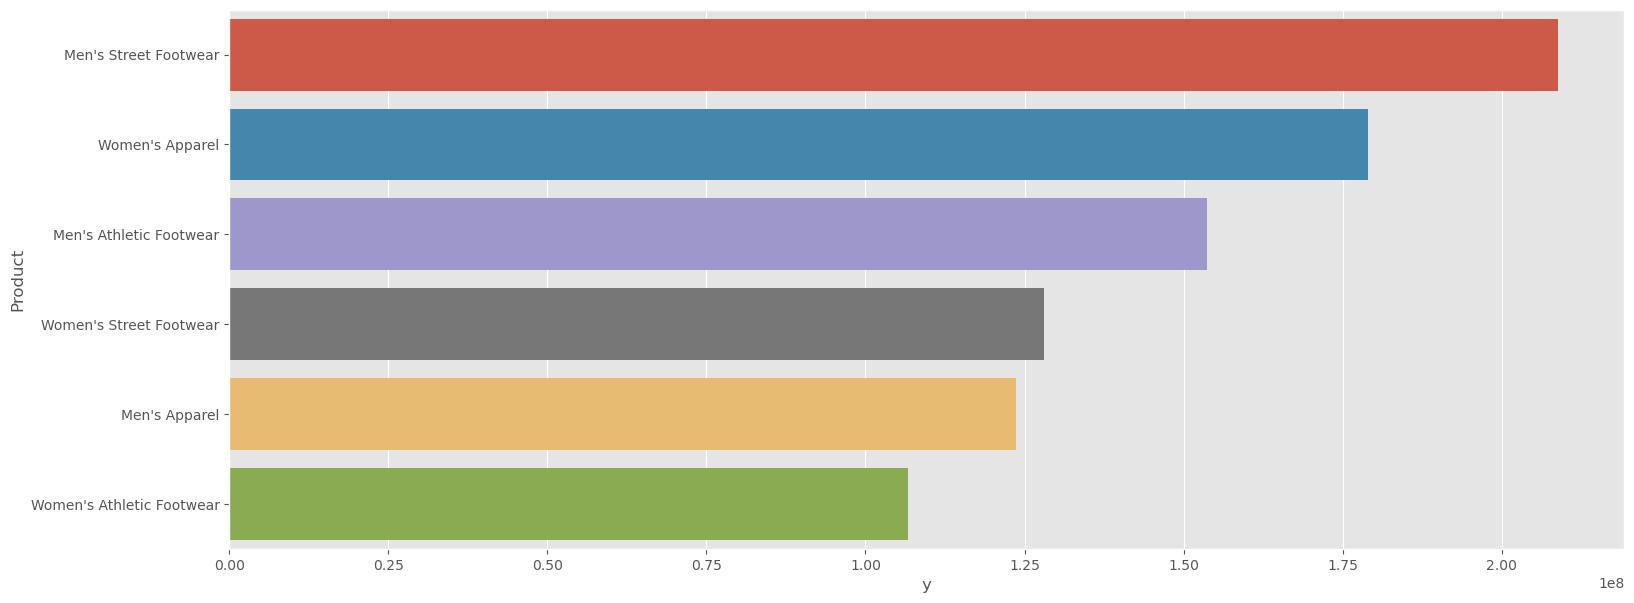

In [10]:
# TOP SELLING PRODUCTS

top_selling_products = df.groupby('Product')['y'].sum().sort_values(ascending=False).reset_index()
top_selling_products.index+=1
sns.barplot(data=top_selling_products,y='Product',x='y')

Observations

- The top selling category is Men's Street Footwear, followed by Women's Apparel.
- Men's Athletic Footwear holds 3rd place.
- Women's Athletic Footwear holds last place.

<Axes: xlabel='Operating Profit', ylabel='City'>

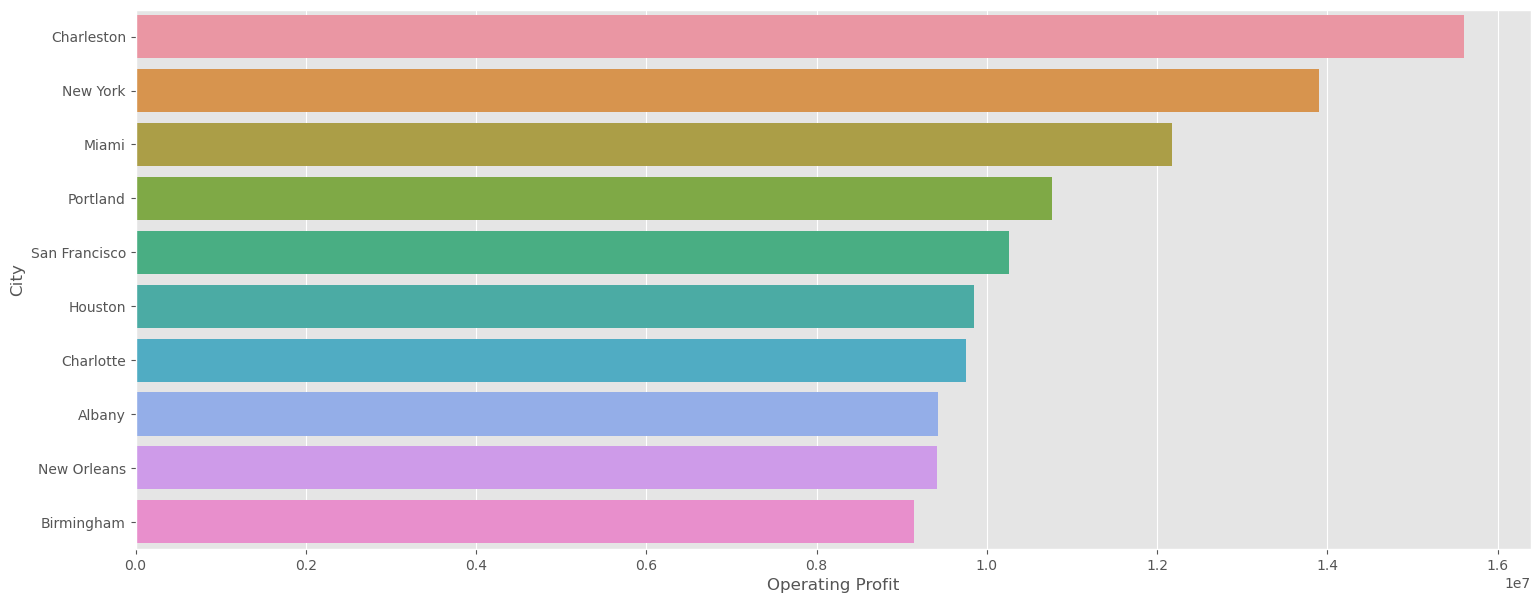

In [11]:
# TOP CITIES

grossing_cities = df.groupby('City')['Operating Profit'].sum().sort_values(ascending=False).reset_index().head(10)
grossing_cities.index+=1
sns.barplot(data=grossing_cities,y='City',x='Operating Profit')

### **Top and Bottom Selling State and City**

In [12]:
df['City_State'] = df['City'] + ', ' + df['State'] #Considering city names alone does not make sense, as some states have common city names.

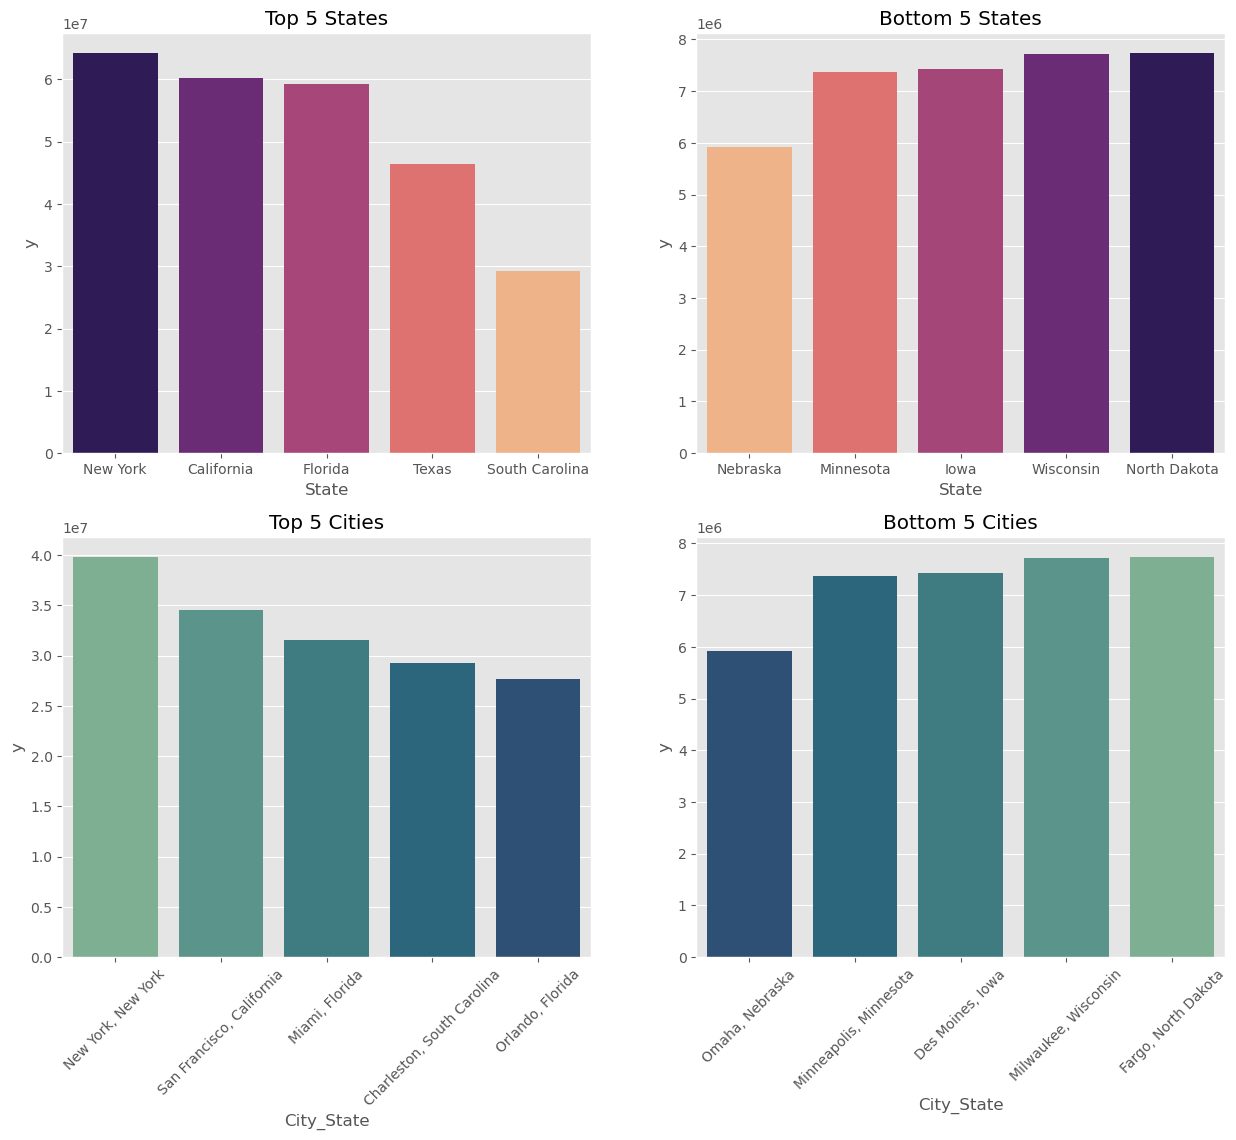

In [13]:
top_states = df.groupby('State')['y'].sum().nlargest(5).reset_index()
bottom_states = df.groupby('State')['y'].sum().nsmallest(5).reset_index()

top_cities = df.groupby('City_State')['y'].sum().nlargest(5).reset_index()
bottom_cities = df.groupby('City_State')['y'].sum().nsmallest(5).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.barplot(x='State', y='y', data=top_states,palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 States')
axes[0, 0].tick_params(axis='x', )

sns.barplot(x='State', y='y', data=bottom_states,palette='magma_r', ax=axes[0, 1])
axes[0, 1].set_title('Bottom 5 States')
axes[0, 1].tick_params(axis='x', )

sns.barplot(x='City_State', y='y', data=top_cities,palette='crest', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Cities')
axes[1, 0].tick_params(axis='x', rotation=45) 

sns.barplot(x='City_State', y='y', data=bottom_cities, palette='crest_r' , ax=axes[1, 1])
axes[1, 1].set_title('Bottom 5 Cities')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()

Observations

- New York state holds first place with total sales of 64.22 million dollars.
- California and Florida have close competition for second place
- Nebraska is the least-selling state with 5.92 million dollars.
- While the other 4 states (Minnesota, Iowa, Wisconsin, North Dakota) in the bottom 5 have sales of around 7 million dollars.
- New York City holds first place with sales of 39.80 million dollars, followed by San Francisco with sales of 34.53 million dollars.
- Omaha is the least-selling city with 5.92 million dollars followed by Minneapolis, Des Moines, Milwaukee and Fargo

### **Sales Method by Total Sales**

In [14]:
sales_method_pie = df.groupby('Sales Method')['y'].sum().reset_index()
colors = ['#99FFDE', '#ffde99', '#de99ff']

px.pie(sales_method_pie, values='y', names='Sales Method', title='Sales Method by Total Sales', hole=0.4,color_discrete_sequence=colors)

Observations

- The majority 39.6 % of the sales are In-Store followed by Outlet at 32.8% and Online at 27.5%.

### **Price Per Product Distribution**

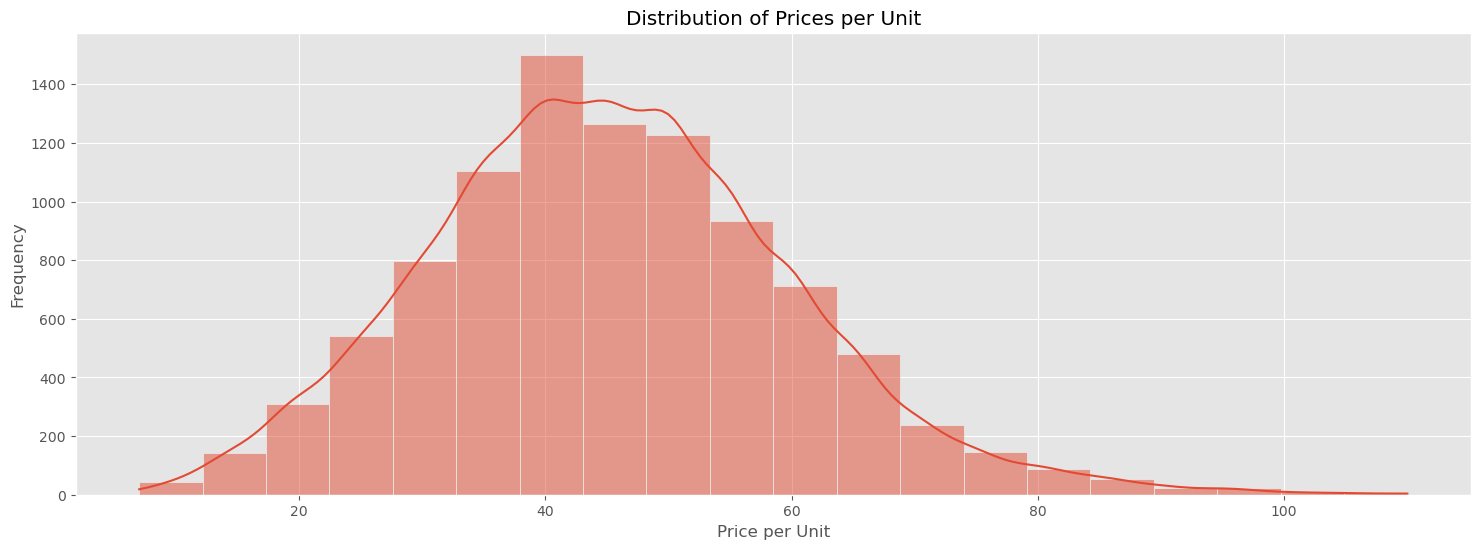

In [15]:
plt.figure(figsize=(18, 6))
sns.histplot(df['Price per Unit'], bins = 20, kde = True)
plt.title('Distribution of Prices per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

Observations

- The price per unit follows a normal distribution. It peaks at 40 dollars, which means the 40 dollars price point is the most common.
- The majority of the products have prices between 20 dollars and 80 dollars.

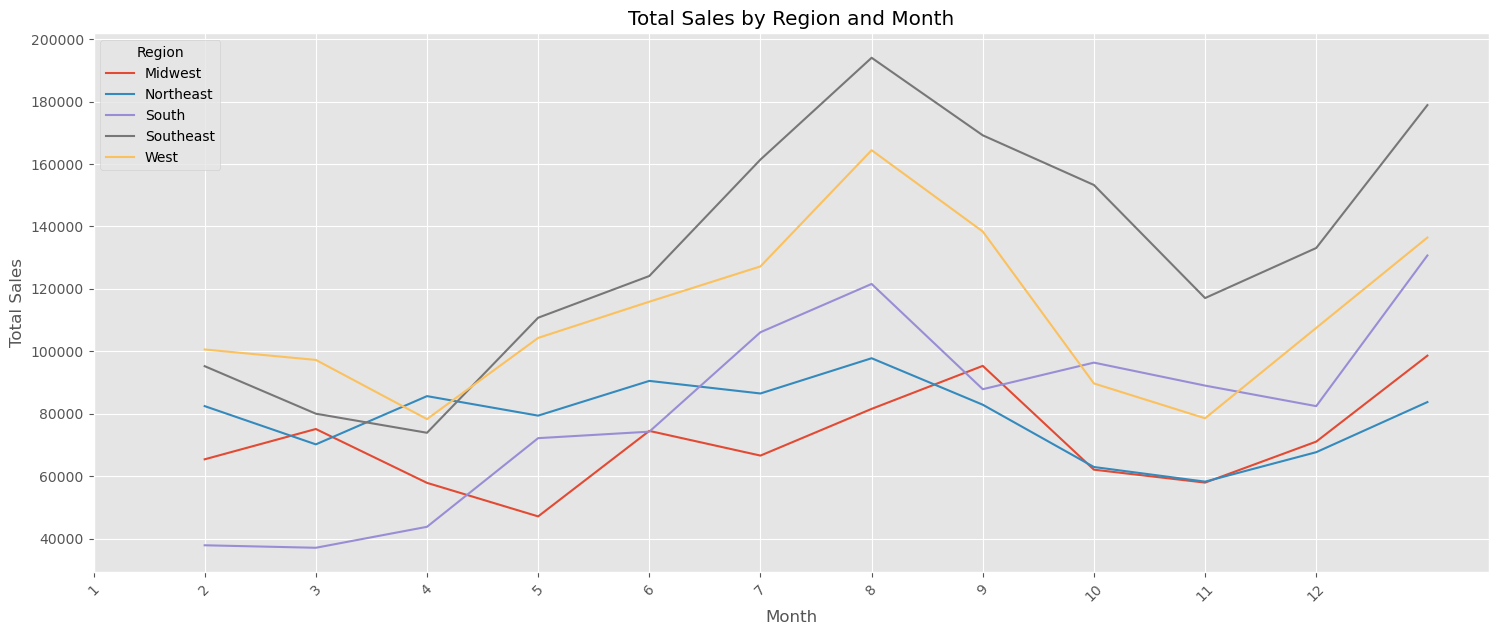

In [16]:
adidas_southeast = df.pivot_table(values='y', index='Month', columns='Region', fill_value=0)

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the pivot table with the defined month order
#adidas_southeast = adidas_southeast.reindex(month_order)

# Plotting the pivot table
adidas_southeast.plot.line()
plt.xticks(range(len(adidas_southeast.index)), adidas_southeast.index)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Month')
plt.xticks(rotation=45)
# Display the plot
plt.show()

- We have an increas in Sales at Summer times and close to Christmas Holidays

- We have two supper performing region and two underperformin and also one with average performans

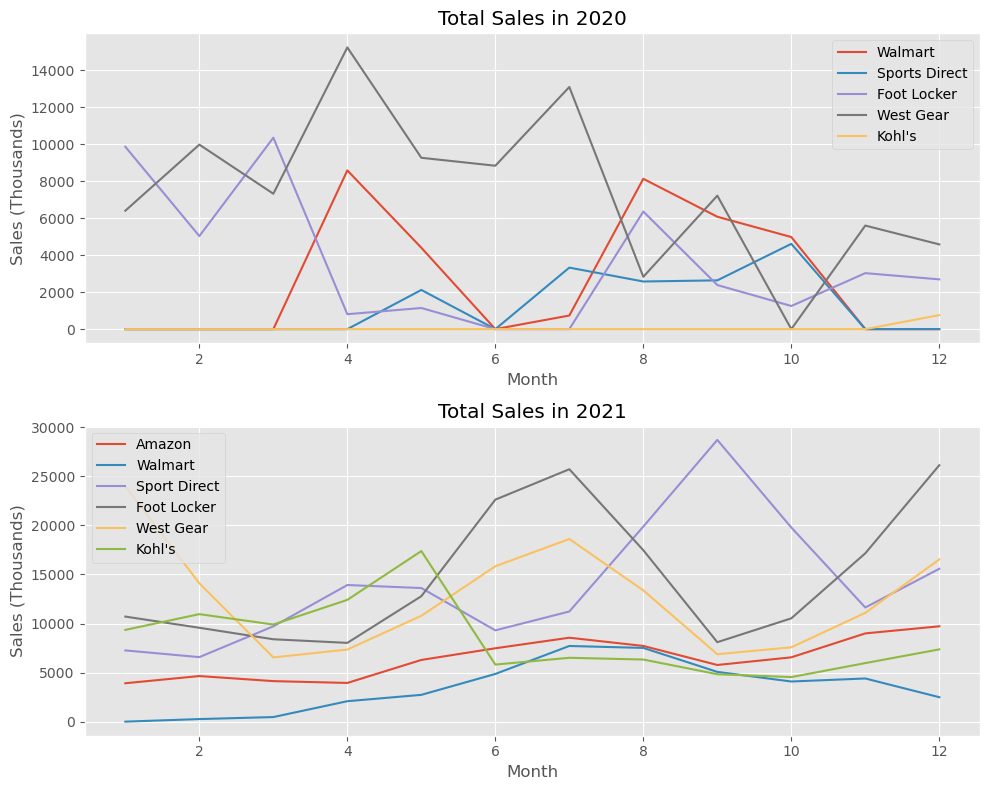

In [17]:
adidas_2020=df[df['Year']==2020]
adidas_2021=df[df['Year']==2021]

adidas_retailer_2020=pd.pivot_table(adidas_2020,values='y',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2020=(adidas_retailer_2020/1000).round(2)

adidas_retailer_2021=pd.pivot_table(adidas_2021,values='y',index=['Month'],columns='Retailer', aggfunc=np.sum,fill_value=0)
adidas_retailer_Thousands_2021=(adidas_retailer_2021/1000).round(2)

adidas_retailer_Thousands_2020=adidas_retailer_Thousands_2020
adidas_retailer_Thousands_2021=adidas_retailer_Thousands_2021
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020[['Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Walmart','Sports Direct','Foot Locker','West Gear'])
axes[0].plot(adidas_retailer_Thousands_2020.index, adidas_retailer_Thousands_2020["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[0].set_title('Total Sales in 2020')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales (Thousands)')
axes[0].legend()

axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021[['Amazon','Walmart','Sports Direct','Foot Locker','West Gear']], 
             label=['Amazon','Walmart','Sport Direct','Foot Locker','West Gear'])
axes[1].plot(adidas_retailer_Thousands_2021.index, adidas_retailer_Thousands_2021["Kohl's"], label="Kohl's")
# Add more lines for other retailers as needed
axes[1].set_title('Total Sales in 2021')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Sales (Thousands)')
axes[1].legend()

plt.tight_layout()
plt.show()

For 2021

1. From our observation we can see that most summer sales appeared at "Foot Locker"& "West Gear"

2. But in same time we have outliers like "Sport Direct" which has an increase in sales at September while other retailers have decrease in sales

3. We have also "West Gear" one more outlier that has good sales at January

In 2020 we dont have much data to make a proper seasonal sales analysis about all retailers but with what we have "West Gear" leader in sales at summer and April ( I thin it was in times of lockdown)

It is enough for regional and retailer analysis for basic understanding of trend performance in regions and what season and retailer best performer in which month.

### **We found top Sales Product in Adidas company for last two years**

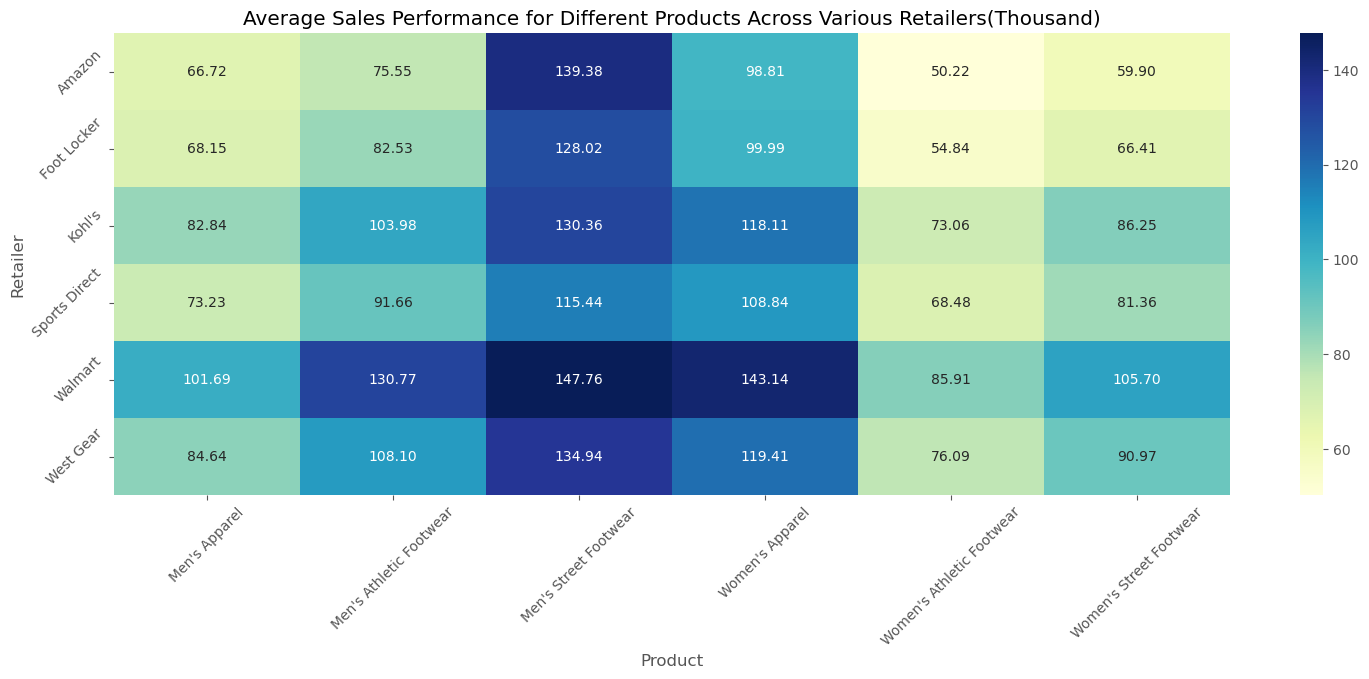

In [18]:
adidas_product_retailer_k=(df.pivot_table(values='y',index='Retailer',columns='Product',aggfunc=np.mean)/1000).round(2)

# Create heatmap
plt.figure(figsize=(18, 6))  # Adjust the figure size if needed
sns.heatmap(adidas_product_retailer_k, annot=True, fmt=".2f", cmap="YlGnBu")

# Set plot title and labels
plt.title("Average Sales Performance for Different Products Across Various Retailers(Thousand)")
plt.xlabel("Product")
plt.ylabel("Retailer")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Show the plot
plt.show()

1. Best selling product in average (Men's Street Footwear) in all our retailers

2. Also Walmart have a good performans in seling all of our products in average .

3. There is tree type of most selled average product in all our retailers and its (Men's Street Footwear,Women's Apparel,Men's Athletic Footwear)

### **Monthly Total Sales Over Years**

In [19]:
yearly_sales = df.groupby(['Year','Month'])['y'].sum().reset_index()

In [20]:
px.line(yearly_sales, x='Month', y='y', color='Year',title='Monthly Total Sales Over Years', markers=True, template= "none")

In [21]:
df.groupby('Year')['y'].sum().reset_index()

,Year,y
0,2020,182080675.0
1,2021,717821450.0


Observations

The sales have shown significant growth from 2020 to 2021.

2021

- There was a dip in sales during March, followed by a rise that peaked in July, a decline in August, and another rise starting in November.
- The month of July had the highest sales with 78.33 million dollars.
- In terms of sales, March generated the lowest revenue of 39.14 million dollars.
- Total Sales 717.82 million dollars

2020

- There was a rise in sales in April, followed by a decline and dip in June, another rise and dip in October, and an all-time low in December.
- The month of April had the highest sales with 24.60 million dollars.
- In terms of sales, December generated the lowest revenue of 8.02 million dollars.
- Total Sales 182.08 million dollars

### **Monthly Total Profit Over Years**

In [22]:
yearly_profit = df.groupby(['Year','Month'])['Operating Profit'].sum().reset_index()

In [23]:
px.line(yearly_profit, x='Month', y='Operating Profit', color='Year',title='Monthly Total Profit Over Years', markers=True, template= "simple_white")

In [24]:
pd.options.display.float_format = '{:.0f}'.format

df.groupby('Year').agg({"Operating Profit" : "sum"})

,Operating Profit
Year,
2020,63375710
2021,268759412


Observations

The Profit have shown significant growth from 2020 to 2021.

2021

- There was a dip in profit during March, followed by a rise that peaked in July, a decline in August, and another rise starting in November.
- The month of July had the highest profit with 29.13 million dollars.
- In terms of profit, March generated the lowest profit of 14.57 million dollars.
- Total profit 268.75 million dollars.

2020

- There was a rise in profit in April, followed by a decline and dip in June, another rise and dip in October, and an all-time low in December.
- The month of April had the highest profit with 9.30 million dollars.
- In terms of profit, June generated the lowest profit of 2.29 million dollars.
- Total profit 63.37 million dollars.

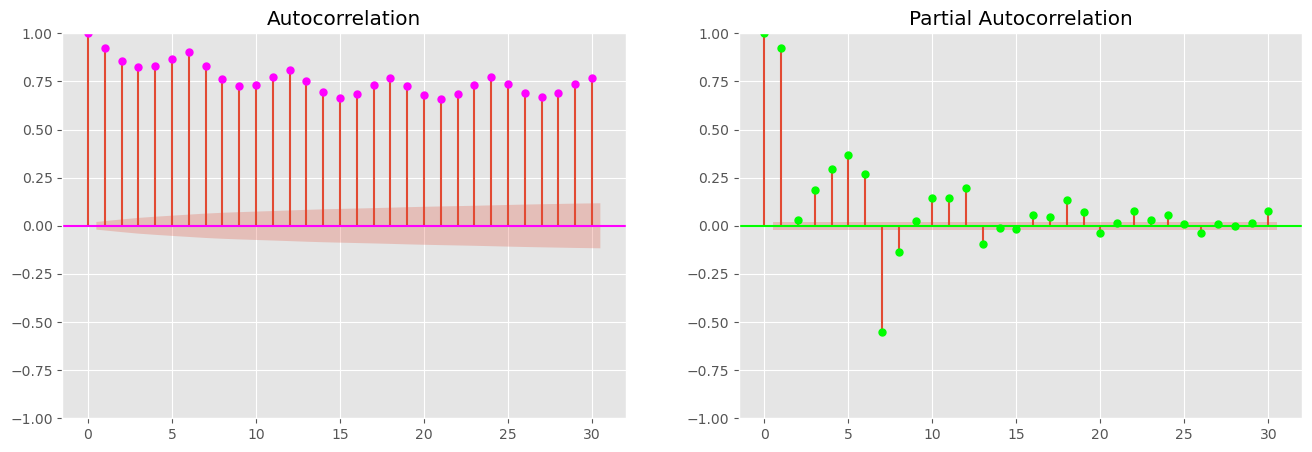

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_acf(df["y"],  lags=30, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=30, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')
plt.show()

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 30 daily.

In [26]:
data=df.groupby("ds")[["y"]].sum().reset_index()
data["unique_id"]="1"

In [27]:
train = data[data.ds<='2021-12-01'] 
test=data[(data['ds'] > '2021-12-01')]

train.shape, test.shape

((694, 3), (30, 3))

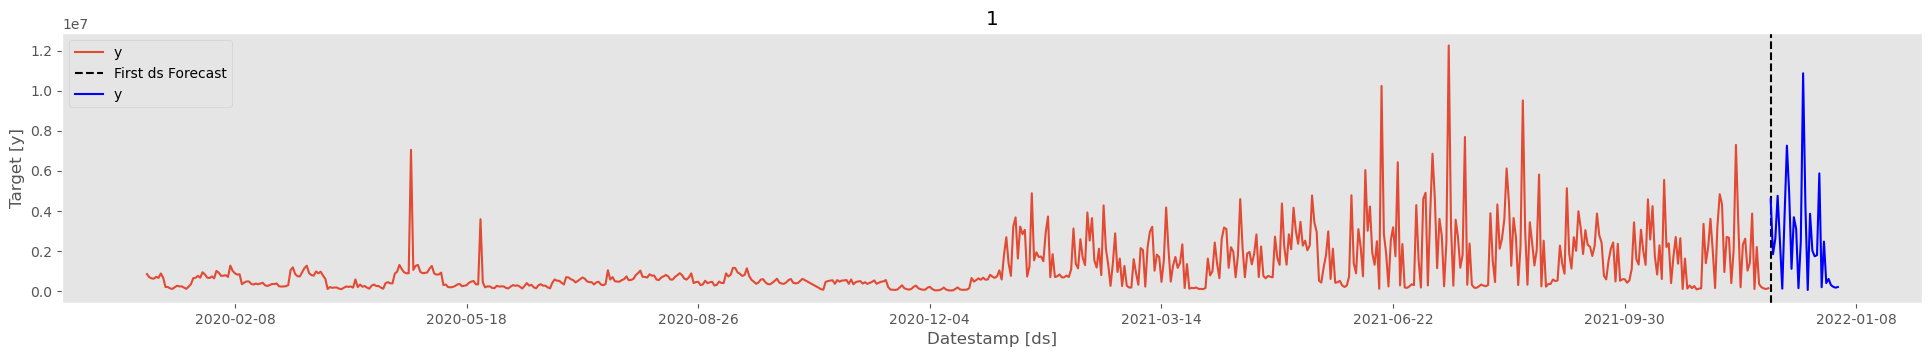

In [28]:
StatsForecast.plot(train, test)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `AutoARIMA`, `AutoETS` model, using the `AutoARIMA, AutoETS` function. This model will help us forecast user demand in the next 30 daily.

In [29]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA, SeasonalNaive, AutoETS

In [31]:
season_length = 7 # daily data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          SeasonalNaive(season_length=season_length)]

In [32]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='D', 
    n_jobs=-1)

## **Fit the Model**

In [33]:
sf.fit()

StatsForecast(models=[AutoARIMA,AutoETS,SeasonalNaive])

## **Predict Method**
We will use the predict method to forecast the last 30 days for the sale total of Adidas. This method only has one parameter, the forecast horizon.

In [34]:
Y_hat = sf.predict(horizon)
Y_hat

,ds,AutoARIMA,AutoETS,SeasonalNaive
unique_id,,,,
1,2021-12-02,139780,1120196,102264
1,2021-12-03,1161100,1044643,2196503
1,2021-12-04,307029,1129871,342275
1,2021-12-05,502142,1034063,189405
1,2021-12-06,634377,1044621,129855
1,2021-12-07,676809,1141906,100678
1,2021-12-08,769303,1075579,137040
1,2021-12-09,838809,1120196,102264
1,2021-12-10,1295377,1044643,2196503


## **Forecasting Plot**

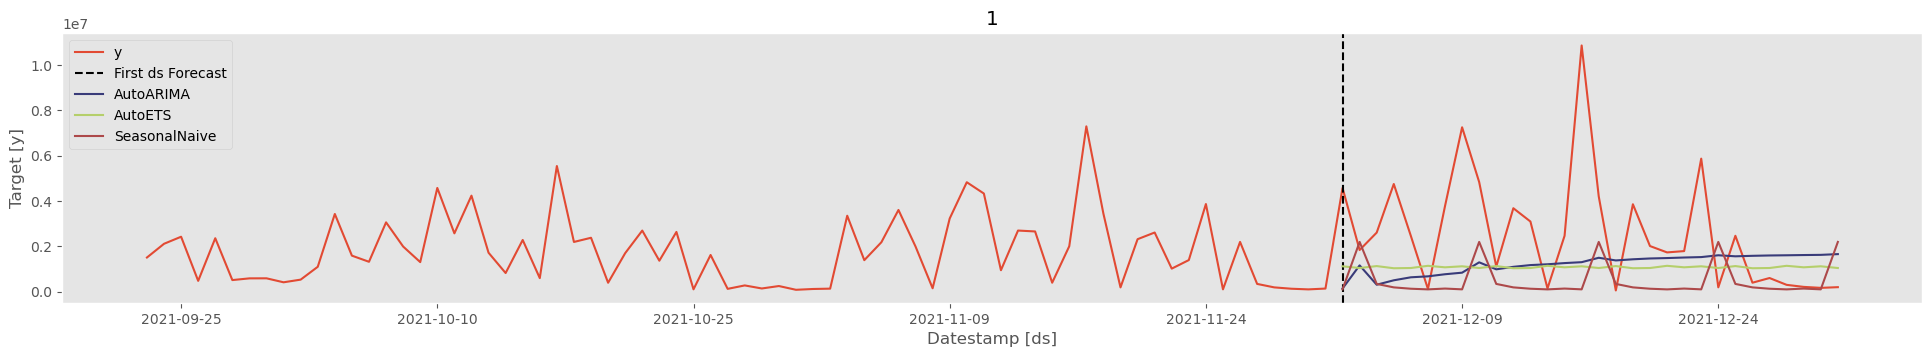

In [36]:
sf.plot(data, Y_hat, max_insample_length=100)

<a id="6"></a>
# **Evaluate the model**

In [37]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate 

In [38]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [39]:
evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","AutoETS", "SeasonalNaive"])

,mase,mae,mape,rmse,smape
AutoARIMA,2,2184492,295,2955801,113
AutoETS,2,2075584,240,2887081,107
SeasonalNaive,2,2396269,154,3360347,135


<a id="7"></a>
# **Exogenous variables**
We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

In [40]:
df_exo=df.groupby("ds")[["y",'Units Sold','Operating Profit','Total Cost']].sum().reset_index()
df_exo["unique_id"]="1"
df_exo

,ds,y,Units Sold,Operating Profit,Total Cost,unique_id
0,2020-01-01,845141,2361,382132,463009,1
1,2020-01-02,689410,2310,225947,463463,1
2,2020-01-03,632573,2302,202279,430294,1
3,2020-01-04,615080,2085,228235,386845,1
4,2020-01-05,707829,1917,222392,485437,1
...,...,...,...,...,...,...
719,2021-12-27,602353,1314,282960,319393,1
720,2021-12-28,301010,749,106359,194651,1
721,2021-12-29,211109,557,85281,125828,1
722,2021-12-30,167903,442,62110,105793,1


In [41]:
exogen=df_exo[["ds","unique_id", 'Units Sold','Operating Profit','Total Cost']]
exogen

,ds,unique_id,Units Sold,Operating Profit,Total Cost
0,2020-01-01,1,2361,382132,463009
1,2020-01-02,1,2310,225947,463463
2,2020-01-03,1,2302,202279,430294
3,2020-01-04,1,2085,228235,386845
4,2020-01-05,1,1917,222392,485437
...,...,...,...,...,...
719,2021-12-27,1,1314,282960,319393
720,2021-12-28,1,749,106359,194651
721,2021-12-29,1,557,85281,125828
722,2021-12-30,1,442,62110,105793


# **Splitting training and test data with exogenous variables**
<a id="8"></a>
Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 8 weekly to test and evaluate the performance of our model.

In [42]:
train_exo = df_exo[df_exo.ds<='2021-12-01'] 
test_exo=exogen[(exogen['ds'] > '2021-12-01')]

train_exo.shape, test_exo.shape

((694, 6), (30, 5))

<a id="9"></a>
# **Implementation of StatsForecast with exogenous variables**

In [43]:
season_length = 7 # daily data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models_exo = [AutoARIMA(season_length=season_length),
          AutoETS(season_length=season_length),
          SeasonalNaive(season_length=season_length)]

In [44]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='D', 
    n_jobs=-1)

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [45]:
sf_exo.fit(train_exo,test_exo)

StatsForecast(models=[AutoARIMA,AutoETS,SeasonalNaive])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

In [46]:
Y_hat_exo=sf_exo.predict(h=horizon,  X_df=test_exo) 
Y_hat_exo

,ds,AutoARIMA,AutoETS,SeasonalNaive
unique_id,,,,
1,2021-12-02,4579102,1120196,102264
1,2021-12-03,1839221,1044643,2196503
1,2021-12-04,2608665,1129871,342275
1,2021-12-05,4753796,1034063,189405
1,2021-12-06,2460557,1044621,129855
1,2021-12-07,119040,1141906,100678
1,2021-12-08,3780923,1075579,137040
1,2021-12-09,7257917,1120196,102264
1,2021-12-10,4838975,1044643,2196503


## **Forecasting Plot**

In [47]:
actual_exo=df_exo[df_exo.ds>'2021-12-01'] 

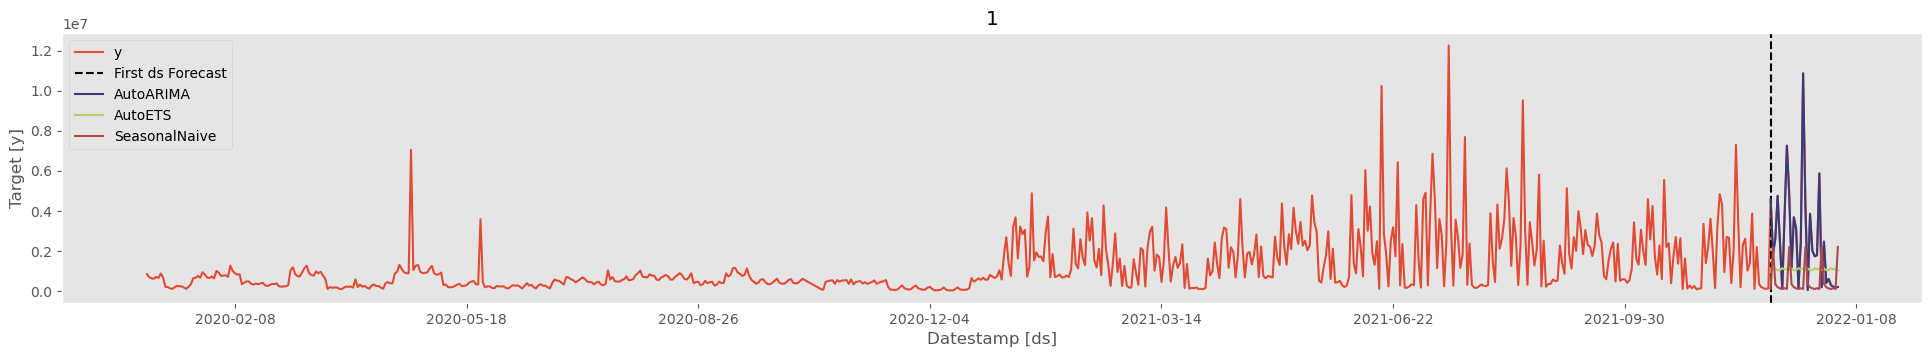

In [48]:
sf.plot(df_exo, Y_hat_exo)

<a id="10"></a>
# **Evaluate the model for exogenous variables**

In [49]:
print("With exogenous variable")
print(evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() , models=["AutoARIMA","AutoETS", "SeasonalNaive"]))
print("======"*10)
print("No exogenous variable")
print(evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","AutoETS", "SeasonalNaive"]))

With exogenous variable
               mase     mae  mape    rmse  smape
AutoARIMA         0       0     0       0      0
AutoETS           2 2075584   240 2887081    107
SeasonalNaive     2 2396269   154 3360347    135
No exogenous variable
               mase     mae  mape    rmse  smape
AutoARIMA         2 2184492   295 2955801    113
AutoETS           2 2075584   240 2887081    107
SeasonalNaive     2 2396269   154 3360347    135


<a id="11"></a>
# **Conclusion**

The analysis provided the results of three models used to forecast ADIDAS sales, with and without exogenous variable. The models evaluated are AutoARIMA, AutoETS and SeasonalNaive. Next, the results will be analyzed in terms of different forecast evaluation metrics.

With exogenous variable:
- AutoARIMA: The results indicate perfect performance for all evaluated metrics (mase, mae, mape, rmse and smape), suggesting that this model fits ADIDAS sales data very well and provides accurate forecasts.
- AutoETS: Although this model shows lower performance than AutoARIMA, it still offers acceptable results. However, the mae, rmse, and smape metrics indicate higher error compared to AutoARIMA.
- SeasonalNaive: This model shows similar performance to AutoETS, with slightly worse results in all metrics. The map indicates that this model has the lowest mean absolute percentage error.

Without exogenous variable:
- AutoARIMA: Compared to the model with exogenous variable, the performance of AutoARIMA worsens in all metrics. The mae, rmse and smape indicate a larger error in this case.
- AutoETS: The results are identical to those obtained with an exogenous variable, which suggests that the lack of an additional variable does not significantly affect the performance of this model.
- SeasonalNaive: Like AutoETS, the results do not show significant changes compared to the model with exogenous variable.

Overall, the results indicate that the AutoARIMA model with exogenous variable offers the best performance in terms of ADIDAS sales forecasting, as it shows the lowest error and the best evaluation metrics compared to the other models evaluated. However, AutoETS and SeasonalNaive also provide acceptable results, especially when an exogenous variable is used. It is important to note that the analysis is based solely on the results presented and no additional information is available regarding the data or methodology used in each model.

<a id="12"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
3. [Exponential smoothing](https://nixtla.github.io/statsforecast/docs/models/autoets.html#table-of-contents)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)

